In [ ]:
import pandas as pd
df = pd.read_csv('clickbait_data.csv')
df.tail

<bound method NDFrame.tail of                                                 headline  clickbait
0                                     Should I Get Bings          1
1          Which TV Female Friend Group Do You Belong In          1
2      The New "Star Wars: The Force Awakens" Trailer...          1
3      This Vine Of New York On "Celebrity Big Brothe...          1
4      A Couple Did A Stunning Photo Shoot With Their...          1
...                                                  ...        ...
31995  To Make Female Hearts Flutter in Iraq, Throw a...          0
31996  British Liberal Democrat Patsy Calton, 56, die...          0
31997  Drone smartphone app to help heart attack vict...          0
31998  Netanyahu Urges Pope Benedict, in Israel, to D...          0
31999  Computer Makers Prepare to Stake Bigger Claim ...          0

[32000 rows x 2 columns]>

In [ ]:
from sklearn.model_selection import train_test_split
headline = df['headline'].values
y = df['clickbait'].values
headline_latih, headline_test, y_latih, y_test = train_test_split(headline, y, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(headline_latih) 
tokenizer.fit_on_texts(headline_test)
 
sekuens_latih = tokenizer.texts_to_sequences(headline_latih)
sekuens_test = tokenizer.texts_to_sequences(headline_test)
 
padded_latih = pad_sequences(sekuens_latih,
                             padding='post',
                             maxlen=5,
                             truncating='post') 
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                            maxlen=5,
                            truncating='post')

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(250, 16),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
800/800 - 5s - loss: 0.2574 - accuracy: 0.8940 - val_loss: 0.2242 - val_accuracy: 0.9148 - 5s/epoch - 7ms/step
Epoch 2/30

Akurasi telah mencapai >90%!
800/800 - 3s - loss: 0.2095 - accuracy: 0.9165 - val_loss: 0.2211 - val_accuracy: 0.9109 - 3s/epoch - 4ms/step


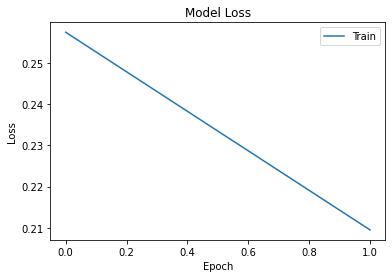

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

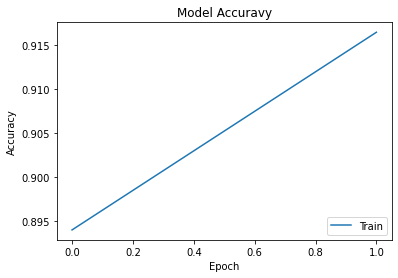

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuravy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

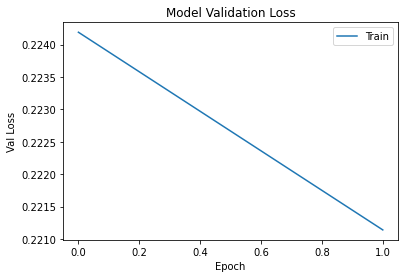

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Val Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

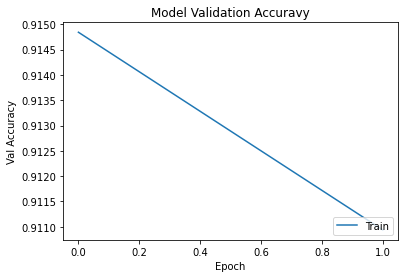

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation Accuravy')
plt.ylabel('Val Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()